In [10]:
from sklearn.manifold import Isomap
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
sulci_distance_matrix = np.load('.././sulci_distance_matrix.npy')
sulci_reg_keys = np.load('.././sulci_reg_keys.npy')
# np.shape(sulci_distance_matrix)

(572, 572)

# Choosing d-dimensionality for ISOMAP

Let Mdist be the input distance matrix. A distance matrix of D-dimensional Gaussian vectors was computed, with the same average square distance as Mdist, which we called Mrand. Using a loop, we computed the reconstruction error edist of the Isomap fitted on Mdist and the reconstruction error erand of the Isomap fitted on Mrand for the whole range of possible number of components for the Isomap, so for d∈[1, dim(Mdist)]. We then considered the number of components maximizing the ratio erand / edist as the intrinsic dimensionality of the manifold 

In [6]:
M_dist = sulci_distance_matrix
M_rand = np.random.rand(M_dist.shape[0], M_dist.shape[1])
M_rand = (M_rand/np.mean(M_rand))*np.mean(M_dist)

In [13]:
# dists = []
# for d in tqdm(range(1, M_rand.shape[0])):
#     isomap = Isomap(n_components=d, n_neighbors=10, n_jobs=-1)
#     isomap.fit(M_dist)
#     e_dist = isomap.reconstruction_error()
#     isomap = Isomap(n_components=d, n_neighbors=10, n_jobs=-1)
#     isomap.fit(M_rand)
#     e_rand = isomap.reconstruction_error()
#     dists.append(e_dist/e_rand)
# pd.to_pickle(dists, '/mrhome/vladyslavz/git/central-sulcus-analysis/shape_features/data/nobackup/isomap_ddists.pkl')

In [26]:
dists = pd.read_pickle('/mrhome/vladyslavz/git/central-sulcus-analysis/shape_features/data/nobackup/isomap_ddists.pkl')

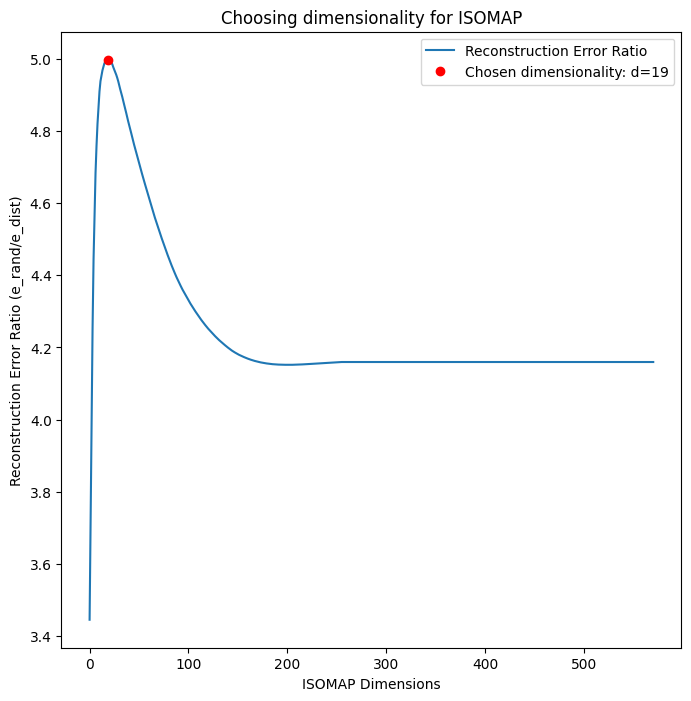

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.plot(dists)
axs.set_xlabel('ISOMAP Dimensions')
axs.set_ylabel('Reconstruction Error Ratio (e_rand/e_dist)')
axs.set_title('Choosing dimensionality for ISOMAP')
axs.plot(np.argmax(dists), np.max(dists), 'ro')
plt.legend(['Reconstruction Error Ratio', f'Chosen dimensionality: d={np.argmax(dists)}'])
plt.show()

# Choosing k-neighbors for ISOMAP

In [30]:
hp_resuluts  =pd.read_pickle('/mrhome/vladyslavz/git/central-sulcus-analysis/shape_features/data/nobackup/hp_resuluts.pkl')


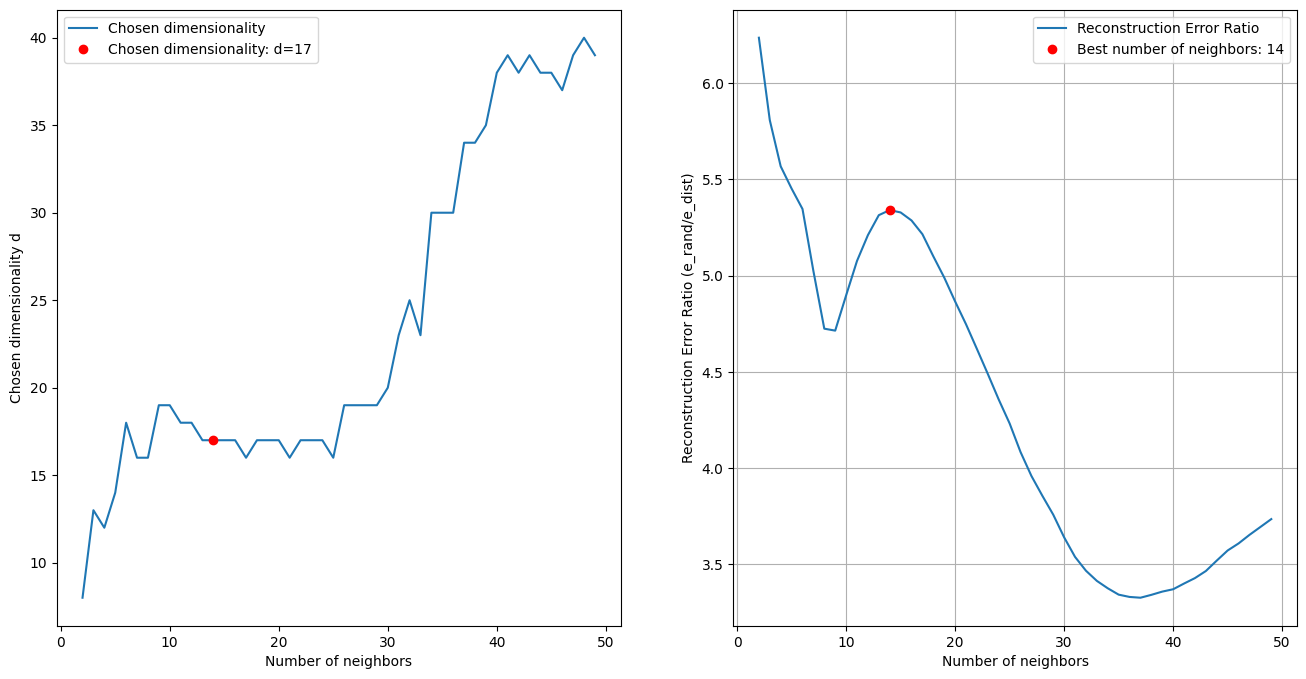

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
best_n = [np.argmax(hp_resuluts[i]) for i in range(len(hp_resuluts))]
best_prop = [np.max(hp_resuluts[i]) for i in range(len(hp_resuluts))]

axs[0].plot(list(range(2,50)), best_n)
axs[0].set_xlabel('Number of neighbors')
axs[0].set_ylabel('Chosen dimensionality d')
axs[0].plot(list(range(2,50))[12], best_n[12], 'ro')
axs[0].legend(['Chosen dimensionality', f'Chosen dimensionality: d={best_n[12]}'])
# plt.show()

axs[1].plot(list(range(2,50)),best_prop)
axs[1].set_xlabel('Number of neighbors')
axs[1].set_ylabel('Reconstruction Error Ratio (e_rand/e_dist)')
axs[1].plot(list(range(2,50))[12], best_prop[12], 'ro')
plt.legend(['Reconstruction Error Ratio', f'Best number of neighbors: {list(range(2, 40))[12]}'])
plt.grid()
plt.show()